Main Script

6 Clases

# Data Loading and Checking

In [1]:
import torch
import torchvision
import torch.utils.data as data
import torchvision.utils as utils
import torch.nn as nn
import torch.nn.functional as F
import skimage.io as io
from torch.utils.data import Dataset, DataLoader
from torchvision import io, transforms
import torchvision.transforms.functional as TF
from tqdm.auto import tqdm
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision import models
import os
import numpy as np
from PIL import Image, ImageOps, ImageFilter
from pathlib import Path
import random
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import pycocotools
import json


import matplotlib.pyplot as plt
%matplotlib inline





e:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\localrun\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local")

## ANNOTATION FILE PARAMETERS

In [3]:
os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local")
ann_File_train = r"Base de Datos\train\annotations\train_data1024.json"
coco_file_train = COCO(ann_File_train)
ann_File_test = r"Base de Datos\test\annotations\test_data1024.json"
coco_file_test = COCO(ann_File_test)

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!
loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [4]:
ann_File_train

'Base de Datos\\train\\annotations\\train_data1024.json'

In [5]:
dataset_view_train = coco_file_train.dataset
print("dataset_view_train type: ", type(dataset_view_train))
print("dataset_view_train.keys(): ", dataset_view_train.keys())


dataset_view_train type:  <class 'dict'>
dataset_view_train.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [6]:
dataset_view_train = coco_file_train.dataset
print("dataset_view_train type: ", type(dataset_view_train))
print("dataset_view_train.keys(): ", dataset_view_train.keys(), "\n")

dataset_view_train_info = dataset_view_train["info"]
print("dataset_view_train_info: ", "Type: ", type(dataset_view_train_info), dataset_view_train_info)
dataset_view_train_licenses = dataset_view_train["licenses"]
print("dataset_view_train_licenses: ", "Type: ", type(dataset_view_train_licenses), dataset_view_train_licenses, "\n")
dataset_view_train_images = dataset_view_train["images"]
print("dataset_view_train_images: ", "Type: ", type(dataset_view_train_images))
print("dataset_view_train_images keys: ", dataset_view_train_images[0].keys(), "\n")
dataset_view_train_annotations = dataset_view_train["annotations"]
print("dataset_view_train_annotations: ", "Type: ", type(dataset_view_train_annotations))
print("dataset_view_train_annotations keys: ", dataset_view_train_annotations[0].keys(), "\n")

dataset_view_train_categories = dataset_view_train["categories"]
print("dataset_view_train_categories: ", "Type: ", type(dataset_view_train_categories))
print("dataset_view_train_categories keys: ", dataset_view_train_categories[0].keys())


dataset_view_train type:  <class 'dict'>
dataset_view_train.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) 

dataset_view_train_info:  Type:  <class 'dict'> {'description': '', 'url': 'None', 'version': '1.0', 'year': 2022}
dataset_view_train_licenses:  Type:  <class 'list'> [] 

dataset_view_train_images:  Type:  <class 'list'>
dataset_view_train_images keys:  dict_keys(['license', 'file_name', 'width', 'height', 'id', 'url', 'date_captured']) 

dataset_view_train_annotations:  Type:  <class 'list'>
dataset_view_train_annotations keys:  dict_keys(['area', 'bbox', 'category_id', 'id', 'image_id', 'iscrowd', 'segmentation']) 

dataset_view_train_categories:  Type:  <class 'list'>
dataset_view_train_categories keys:  dict_keys(['color', 'name', 'id', 'supercategory'])


In [7]:
dataset_view_test = coco_file_test.dataset
print("dataset_view_test type: ", type(dataset_view_test))
print("dataset_view_test.keys(): ", dataset_view_test.keys())


dataset_view_test type:  <class 'dict'>
dataset_view_test.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [8]:
dataset_view_test = coco_file_test.dataset
print("dataset_view_test type: ", type(dataset_view_test))
print("dataset_view_test.keys(): ", dataset_view_test.keys(), "\n")

dataset_view_test_info = dataset_view_test["info"]
print("dataset_view_test_info: ", "Type: ", type(dataset_view_test_info), dataset_view_test_info)
dataset_view_test_licenses = dataset_view_test["licenses"]
print("dataset_view_test_licenses: ", "Type: ", type(dataset_view_test_licenses), dataset_view_test_licenses, "\n")
dataset_view_test_images = dataset_view_test["images"]
print("dataset_view_test_images: ", "Type: ", type(dataset_view_test_images))
print("dataset_view_test_images keys: ", dataset_view_test_images[0].keys(), "\n")
dataset_view_test_annotations = dataset_view_test["annotations"]
print("dataset_view_test_annotations: ", "Type: ", type(dataset_view_test_annotations))
print("dataset_view_test_annotations keys: ", dataset_view_test_annotations[0].keys(), "\n")

dataset_view_test_categories = dataset_view_test["categories"]
print("dataset_view_test_categories: ", "Type: ", type(dataset_view_test_categories))
print("dataset_view_test_categories keys: ", dataset_view_test_categories[0].keys())

dataset_view_test type:  <class 'dict'>
dataset_view_test.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) 

dataset_view_test_info:  Type:  <class 'dict'> {'description': '', 'url': 'None', 'version': '1.0', 'year': 2022}
dataset_view_test_licenses:  Type:  <class 'list'> [] 

dataset_view_test_images:  Type:  <class 'list'>
dataset_view_test_images keys:  dict_keys(['license', 'file_name', 'width', 'height', 'id', 'url', 'date_captured']) 

dataset_view_test_annotations:  Type:  <class 'list'>
dataset_view_test_annotations keys:  dict_keys(['area', 'bbox', 'category_id', 'id', 'image_id', 'iscrowd', 'segmentation']) 

dataset_view_test_categories:  Type:  <class 'list'>
dataset_view_test_categories keys:  dict_keys(['color', 'name', 'id', 'supercategory'])


In [9]:
len(dataset_view_test_annotations)

1871

## DATA DEFINITION

Comprobando si git rastrea cambios abriendolos desde VSC

In [10]:

import json

with open(r'Base de Datos\train\annotations\train_data1024.json', 'r') as f:
    dataset = json.load(f)

# Get image from ID
image_id = 2
print("Image ID: ", image_id)


annotations = [annotation for annotation in dataset['annotations'] if annotation['image_id'] == image_id]
category_counts = {}

# Objects Count and area calculation
total_count = 0
total_area = 1024*1024
for annotation in annotations:
    category_id = annotation['category_id']
    if category_id not in category_counts:
        category_counts[category_id] = {'count': 0, 'area': 0}
    category_counts[category_id]['count'] += 1
    category_counts[category_id]['area'] += annotation['area']
    total_count += 1


# Category Mapping and printing value
category_mapping = {category['id']: category['name'] for category in dataset['categories']}
print("Distribución de la base de datos de Train")
for category_id, counts in category_counts.items():
    category = category_mapping[category_id]
    count = counts['count']
    area = counts['area']
    print(f"Categoría: {category}, cantidad de objetos: {count}, área total: {area}", "píxeles")

print(f"Cantidad total de objetos en la imagen: {total_count}")
print(f"Área total de la imagen: {total_area}", "pixeles")


Image ID:  2
Distribución de la base de datos de Train
Categoría: healthy, cantidad de objetos: 66, área total: 538346.0 píxeles
Categoría: botritisone, cantidad de objetos: 141, área total: 160689.0 píxeles
Categoría: botritistwo, cantidad de objetos: 8, área total: 3893.5 píxeles
Categoría: botritisthree, cantidad de objetos: 11, área total: 2925.5 píxeles
Categoría: defnutrition, cantidad de objetos: 104, área total: 83007.5 píxeles
Categoría: background, cantidad de objetos: 306, área total: 373145.5 píxeles
Cantidad total de objetos en la imagen: 636
Área total de la imagen: 1048576 pixeles


In [11]:

import json
with open(r'Base de Datos\test\annotations\test_data1024.json', 'r') as f:
    dataset = json.load(f)


category_areas = {}
for annotation in dataset['annotations']:
    category_id = annotation['category_id']
    area = annotation['area']

    if category_id not in category_areas:
        category_areas[category_id] = 0

    category_areas[category_id] += area


category_mapping = {category['id']: category['name'] for category in dataset['categories']}
print("Área total por categoría en Train:")
for category_id, area in category_areas.items():
    category = category_mapping[category_id]
    print(f"Categoría: {category}, área total: {area}")



Área total por categoría en Train:
Categoría: healthy, área total: 1762823.0
Categoría: botritisone, área total: 440249.5
Categoría: botritistwo, área total: 98588.5
Categoría: botritisthree, área total: 23788.0
Categoría: defnutrition, área total: 749277.5
Categoría: background, área total: 1265239.0


## JSON FILE KEYS

In [ ]:
with open(r'Base de Datos\train\annotations\train_data1024.json', 'r') as f:
    data = json.load(f)
annotation_keys = data['annotations'][0].keys()
categories_keys = data['categories'][0].keys()

print("Keys principales: ", data.keys())
print("Keys imágeness:", data['images'][0].keys())
print("Keys anotaciones:",annotation_keys)
print("Keys categorias:",categories_keys)

categories_data = data['categories']
print(categories_data)

# DATALOADER SS UNET Train

In [1]:
import os
import numpy as np
import random
import torch
import torchvision
import torchvision.utils as utils
from torchvision import io, transforms
import torchvision.transforms.functional as TF
import torchvision.transforms as T
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
import torch.optim as optim
from PIL import Image, ImageOps, ImageFilter
from pycocotools.coco import COCO
from tqdm.auto import tqdm
from pycocotools.coco import COCO
import json

import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local")

class CocoSemSegUNET(data.Dataset):
    def __init__(self, coco_json_file, split, transform=None):
        self.coco = COCO(coco_json_file)
        self.image_ids = self.coco.getImgIds()
        self.transform = transform
        self.split = split
        self.class_names = ['background', 'healthy', 'botritisone', 'botritistwo', 'botritisthree', 'defnutrition']
        self.num_classes = len(self.class_names)


        # Calculate frequencies and weights from each class
        self.class_frequencies = self._calculate_class_frequencies()
        self.class_weights = self._calculate_class_weights()

    def _calculate_class_frequencies(self):
        class_frequencies = np.zeros(self.num_classes)  

        for image_id in self.image_ids:
            annotation_ids = self.coco.getAnnIds(imgIds=image_id)
            annotations = self.coco.loadAnns(annotation_ids)

            for ann in annotations:
                category_id = ann['category_id']
                if category_id in range(0,6):
                    class_frequencies[category_id] += ann['area']
        
        for category_id, frequency in enumerate(class_frequencies):
          print(f"Category ID: {category_id}, Frequency: {frequency}")

        return class_frequencies

    def _calculate_class_weights(self):
        total_samples = np.sum(self.class_frequencies)
        class_areas = np.zeros_like(self.class_frequencies)

        for image_id in self.image_ids:
            annotation_ids = self.coco.getAnnIds(imgIds=image_id)
            annotations = self.coco.loadAnns(annotation_ids)

            for ann in annotations:
                category_id = ann['category_id']
                if category_id in range(0,6):
                    area = ann['area']
                    class_areas[category_id] += area

        class_weights = 1.0 / (6.0*class_areas / total_samples) 
        class_weights /= np.max(class_weights)  
        #print("class_weights.shape", class_weights.shape)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device)

        return class_weights

    def __getitem__(self, index):
        image_id = self.image_ids[index]
        image_info = self.coco.loadImgs(image_id)[0]
        #print("image_info:", image_info)
        base_dataset_dir = r'E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\Base de Datos'
        image_path = os.path.join(base_dataset_dir, self.split, 'images_for_unet', image_info['file_name'])
        image = Image.open(image_path).convert('RGB')
        annotation_ids = self.coco.getAnnIds(imgIds=image_id)
        annotations = self.coco.loadAnns(annotation_ids)
        masks = self._generate_masks(annotations, image.size)

        if self.transform is not None:
            image = self.transform(image)

        return image, masks

    def __len__(self):
        return len(self.image_ids)


    def _generate_masks(self, annotations, image_size):
        num_classes = self.num_classes  
        masks = torch.zeros(num_classes, *image_size)  
        category_counts = {category_id: 0 for category_id in range(num_classes)}  
        total_objects = 0  

        for ann in annotations:
            category_id = ann['category_id']
            #print("img id", ann["image_id"])
            if category_id in range(0,6):
                mask = self.coco.annToMask(ann)

            # Get the Binary mask per channel
                mask_tensor = torch.from_numpy(mask).float()
                binary_mask = (mask_tensor > 0).float()
                masks[category_id] += binary_mask
                category_counts[category_id] += 1
                # Object count per category
                total_objects += 1

        print("Conteo por categoría:", category_counts)
        print("Objetos totales:", total_objects)

        return masks

    def get_class_weights(self):
        return self.class_weights

def custom_collate_fn(batch):
    images, masks = zip(*batch)

    # Conver to Pytorch Tensor
    if isinstance(images[0], torch.Tensor):
        images = torch.stack(images, dim=0)
    else:
        image_transform = transforms.ToTensor()
        images = [image_transform(image) for image in images]
        images = torch.stack(images, dim=0)

    masks = torch.stack(masks, dim=0)
    return images, masks

# Paths

split1 = "train"
coco_json_file1 = r'Base de Datos\train\annotations\train_data1024.json'
split2 = "test"
coco_json_file2 = r'Base de Datos\test\annotations\test_data1024.json'

transform = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# DataSet and DataLoader Objects Creation
dataset_train = CocoSemSegUNET(coco_json_file1, split1, transform=transform)
dataloader_train = data.DataLoader(dataset_train, batch_size=1, shuffle=True, collate_fn=custom_collate_fn)
dataset_test = CocoSemSegUNET(coco_json_file2, split2, transform=transform)
dataloader_test = data.DataLoader(dataset_test, batch_size=1, shuffle=True, collate_fn=custom_collate_fn)
dataset_used = "RAW 6 Classes"

class_frequencies_train = dataset_train._calculate_class_frequencies()
class_weights_train = dataset_train._calculate_class_weights()
print("Class Frequencies Train:", class_frequencies_train)
print("Class Weights Train:", class_weights_train)

class_frequencies_test = dataset_test._calculate_class_frequencies()
class_weights_test = dataset_test._calculate_class_weights()
print("Class Frequencies Test:", class_frequencies_test)
print("Class Weights Test:", class_weights_test)

e:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\localrun\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Category ID: 0, Frequency: 3109495.0
Category ID: 1, Frequency: 5370866.5
Category ID: 2, Frequency: 1045312.5
Category ID: 3, Frequency: 50682.5
Category ID: 4, Frequency: 103966.5
Category ID: 5, Frequency: 1027961.5
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Category ID: 0, Frequency: 1265239.0
Category ID: 1, Frequency: 1762823.0
Category ID: 2, Frequency: 440249.5
Category ID: 3, Frequency: 98588.5
Category ID: 4, Frequency: 23788.0
Category ID: 5, Frequency: 749277.5
Category ID: 0, Frequency: 3109495.0
Category ID: 1, Frequency: 5370866.5
Category ID: 2, Frequency: 1045312.5
Category ID: 3, Frequency: 50682.5
Category ID: 4, Frequency: 103966.5
Category ID: 5, Frequency: 1027961.5
Class Frequencies Train: [3109495.  5370866.5 1045312.5   50682.5  103966.5 1027961.5]
Class Weights Train: tensor([0.0163, 0.0094, 0.0485, 1.0000, 0.4875, 0.0493], device='cuda:0'

# SAMPLE BATCHES AND WEIGHTS

In [29]:
batch = next(iter(dataloader_train))


Conteo por categoría: {0: 41, 1: 4, 2: 5, 3: 56}
Objetos totales: 106


In [31]:
batch_test = next(iter(dataloader_test))

Conteo por categoría: {0: 21, 1: 3, 2: 14, 3: 49}
Objetos totales: 87


In [32]:
batch_images, batch_masks = batch
batch_images_t, batch_masks_t = batch_test

print("imagen.shape: ", batch_images.shape)
print("masks.shape: ", batch_masks.shape)
print("imagen_t.shape: ", batch_images_t.shape)
print("masks_t.shape: ", batch_masks_t.shape)

imagen.shape:  torch.Size([1, 3, 1024, 1024])
masks.shape:  torch.Size([1, 4, 1024, 1024])
imagen_t.shape:  torch.Size([1, 3, 1024, 1024])
masks_t.shape:  torch.Size([1, 4, 1024, 1024])


In [2]:
class_frequencies_train = dataset_train._calculate_class_frequencies()
class_weights_train = dataset_train._calculate_class_weights()
print("Class Frequencies Train:", class_frequencies_train)
print("Class Weights Train:", class_weights_train)

class_frequencies_test = dataset_test._calculate_class_frequencies()
class_weights_test = dataset_test._calculate_class_weights()
print("Class Frequencies Test:", class_frequencies_test)
print("Class Weights Test:", class_weights_test)

Category ID: 2, Frequency: 1045312.5
Category ID: 3, Frequency: 50682.5
Category ID: 4, Frequency: 103966.5
Category ID: 5, Frequency: 1027961.5
Class Frequencies Train: [1045312.5   50682.5  103966.5 1027961.5]
Class Weights Train: tensor([0.0485, 1.0000, 0.4875, 0.0493], device='cuda:0')
Category ID: 2, Frequency: 440249.5
Category ID: 3, Frequency: 98588.5
Category ID: 4, Frequency: 23788.0
Category ID: 5, Frequency: 749277.5
Class Frequencies Test: [440249.5  98588.5  23788.  749277.5]
Class Weights Test: tensor([0.0540, 0.2413, 1.0000, 0.0317], device='cuda:0')


Class Weights: [0.01629927 0.00943656 0.0484855  1.         0.48748876 0.04930389]

## Batch plot

0


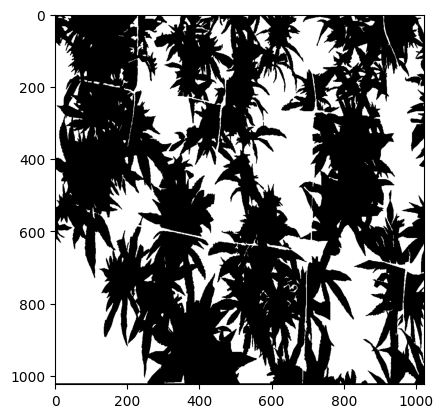

1


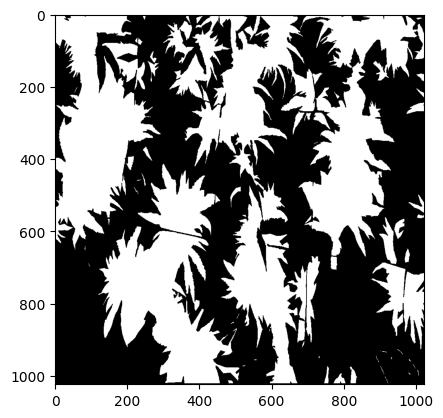

2


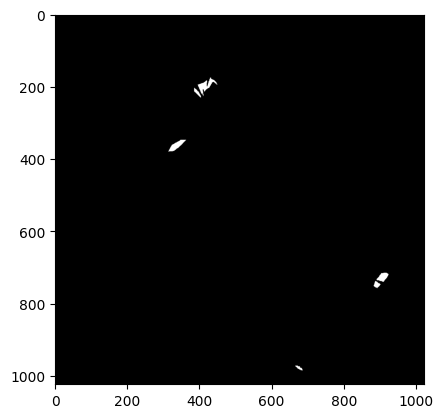

3


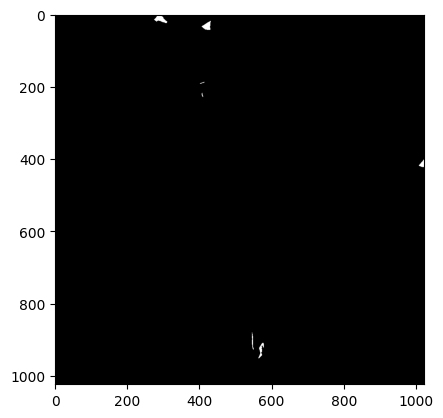

4


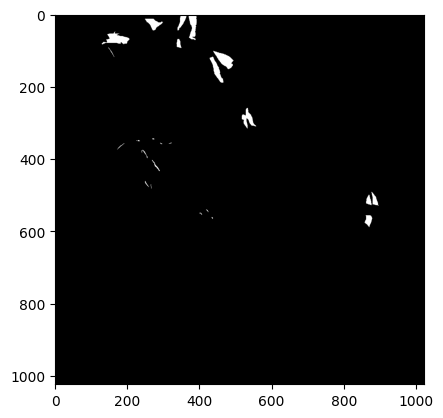

5


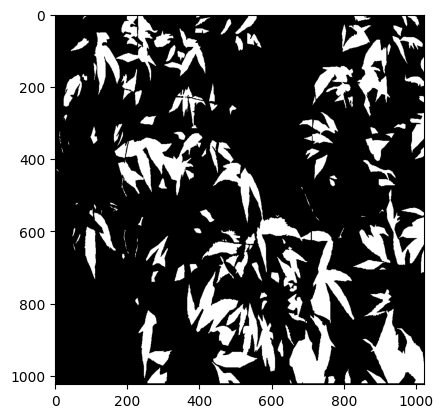

In [31]:

mask = batch_masks[0]

for class_index in range(mask.shape[0]):
    print(class_index)
    mask_channel_np = mask[class_index].numpy()
    plt.imshow(mask_channel_np, cmap='gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


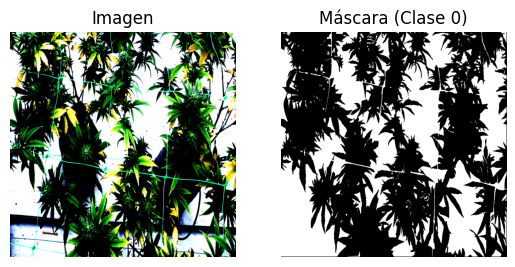

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


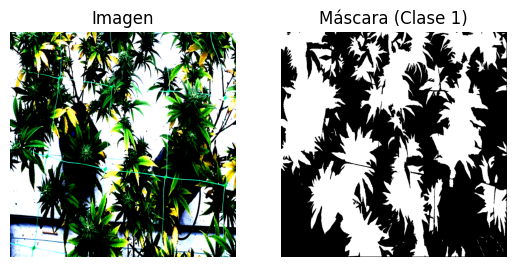

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


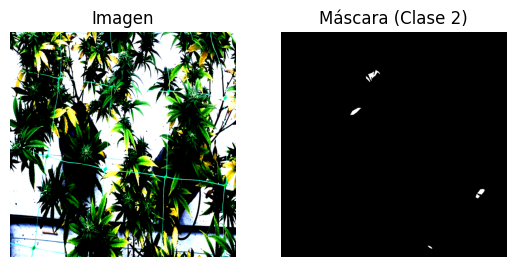

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


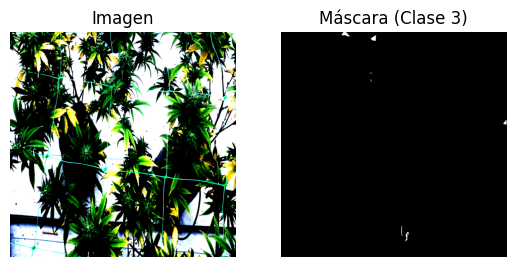

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


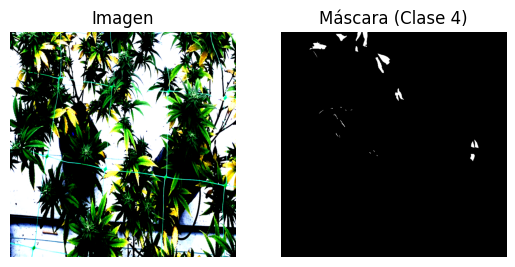

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


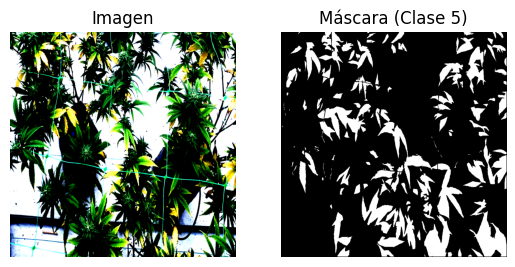

In [32]:
image_toshow = batch_images[0]
mask_toshow = batch_masks[0]

plt.subplot(1, 2, 1)
plt.imshow(image_toshow.permute(1, 2, 0))
plt.axis('off')
plt.title('Imagen')

for class_index in range(mask_toshow.shape[0]):
    
    mask_channel = mask[class_index].numpy()
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_toshow.permute(1, 2, 0))
    plt.axis('off')
    plt.title('Imagen')
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask_channel, cmap='gray')
    plt.axis('off')
    plt.title('Máscara (Clase {})'.format(class_index))

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


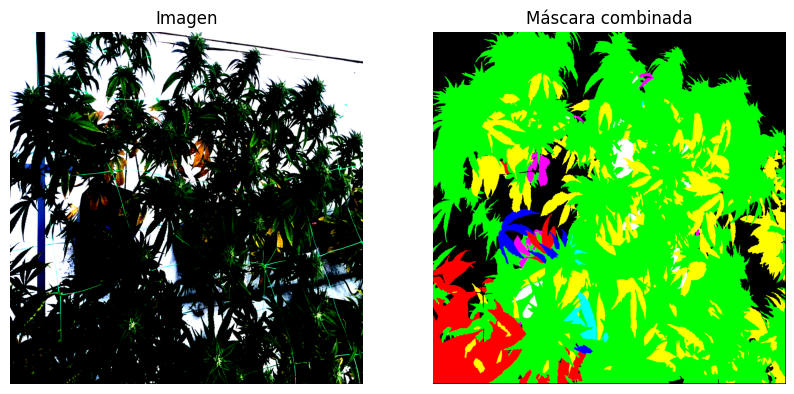

In [28]:
mask = batch_masks[0]

color_map = {
    0: (0, 0, 0),          # Background (Negro)
    1: (0, 255, 0),        # Healthy (verde)
    2: (255, 0, 0),        # Botritis One (rojo)
    3: (0, 0, 255),        # Botritis Two (azul)
    4: (255, 0, 255),     # Botritis Three (amarillo)
    5: (255, 255, 0)       # Defnutrition (magenta)
}

combined_mask = np.zeros((mask.shape[1], mask.shape[2], 3), dtype=np.float64)

for class_index in range(mask.shape[0]):
    mask_channel = mask[class_index].numpy()
    color = color_map[class_index]
    combined_mask += np.expand_dims(mask_channel, axis=2).astype(np.float64) * np.array(color)

combined_mask = np.uint8(np.round(combined_mask))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plotting
ax[0].imshow(batch_images[0].permute(1, 2, 0).numpy())
ax[0].axis('off')
ax[0].set_title('Imagen')

# Full mask plotting
ax[1].imshow(combined_mask)
ax[1].axis('off')
ax[1].set_title('Máscara combinada')
plt.show()

# PLOTTING FROM DATALOADER

In [36]:
image_id = 5
annotations = [annotation for annotation in dataset_view_train['annotations'] if annotation['image_id'] == image_id]

if len(annotations) > 0:
    
    image_info = next((image for image in dataset_view_train['images'] if image['id'] == image_id), None)
    image_path = image_info['file_name']
    image = Image.open(image_path)
    segmentations = [annotation['segmentation'] for annotation in annotations]
    mask = np.zeros((image.height, image.width), dtype=np.uint8)

    for i, segmentation in enumerate(segmentations):
        contour = np.array(segmentation).reshape((-1, 2)).astype(np.int32)
        mask = cv2.drawContours(mask, [contour], -1, (i + 1), thickness=cv2.FILLED)

    colors = [(0, 0, 0)] + [(np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256)) for _ in range(len(segmentations))]
    mask_rgb = np.zeros((image.height, image.width, 3), dtype=np.uint8)

    for i, color in enumerate(colors):
        mask_rgb[mask == i] = color

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Imagen')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_rgb)
    plt.title('Máscara')
    plt.show()
else:
    print("Imagen no encontrada.")




ModuleNotFoundError: No module named 'cv2'

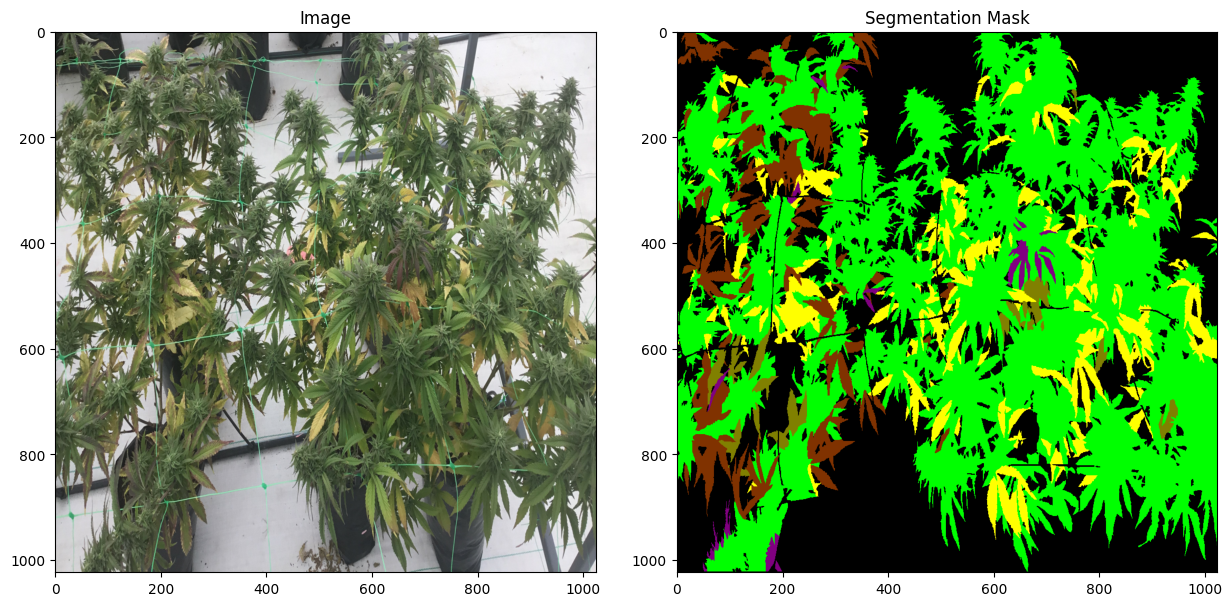

Imagen ID:  0       Objetos de todas las categorias presentes en la imagen.


In [36]:
image_id = 0
annotations = [annotation for annotation in dataset_view_train['annotations'] if annotation['image_id'] == image_id]

if len(annotations) > 0:
    
    image_info = next((image for image in dataset_view_train['images'] if image['id'] == image_id), None)
    image_path = image_info['file_name']
    image = Image.open(image_path)
    segmentations = [annotation['segmentation'] for annotation in annotations]
    category_ids = [annotation['category_id'] for annotation in annotations]
    mask = np.zeros((image.height, image.width), dtype=np.uint8)

    
    for segmentation, category_id in zip(segmentations, category_ids):
        contour = np.array(segmentation).reshape((-1, 2)).astype(np.int32)
        mask = cv2.drawContours(mask, [contour], -1, category_id, thickness=cv2.FILLED)

    category_ids = [0, 1, 2, 3, 4, 5]  # Incluyendo Background
    colors = [(0, 0, 0), (0, 255, 0), (128, 50, 0), (128, 0, 128), (128, 128, 0), (255, 255, 0)]  # Example colors
    mask_rgb = np.zeros((image.height, image.width, 3), dtype=np.uint8)

    for category_id, color in zip(category_ids, colors):
        mask_rgb[mask == category_id] = color

    
    fig = plt.figure(figsize=(15, 10))
    plt.subplots_adjust(wspace=0.15)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_rgb)
    plt.title('Segmentation Mask')

    plt.show()

    # Check if there are objects from all categories
    all_categories = set(category_ids)
    missing_categories = set(category_ids) ^ set(all_categories)
    if missing_categories:
        print("Objetos faltantes de las siguientes categorías:")
        for category_id in missing_categories:
            category_name = next((category['name'] for category in dataset_view_train['categories'] if category['id'] == category_id), None)
            print(category_name)
    else:
        print("Imagen ID: ", image_id, "      Objetos de todas las categorias presentes en la imagen.")
else:
    print("Imagen no encontrada.")


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Specify the image ID for visualization
image_id = 19
test_annotations = [annotation for annotation in dataset_view_test['annotations'] if annotation['image_id'] == image_id]

if len(test_annotations) > 0:
    
    image_info = next((image for image in dataset_view_test['images'] if image['id'] == image_id), None)
    image_path = "/content/drive/MyDrive/FromCOCO/DataBase_Final/test/images/" + image_info['file_name']
    image = Image.open(image_path)
    test_segmentations = [annotation['segmentation'] for annotation in test_annotations]
    test_category_ids = [annotation['category_id'] for annotation in test_annotations]
    mask = np.zeros((image.height, image.width), dtype=np.uint8)

    for segmentation, category_id in zip(test_segmentations, test_category_ids):
        contour = np.array(segmentation).reshape((-1, 2)).astype(np.int32)
        mask = cv2.drawContours(mask, [contour], -1, category_id, thickness=cv2.FILLED)

    category_ids = [0, 1, 2, 3, 4, 5]  # Including Background
    colors = [(0, 0, 0), (0, 255, 0), (128, 50, 0), (128, 0, 128), (128, 128, 0), (255, 255, 0)]  # Example colors
    mask_rgb = np.zeros((image.height, image.width, 3), dtype=np.uint8)

    for category_id, color in zip(category_ids, colors):
        mask_rgb[mask == category_id] = color

    fig = plt.figure(figsize=(15, 10))
    plt.subplots_adjust(wspace=0.15)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Test Image')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_rgb)
    plt.title('Test Segmentation Mask')
    plt.show()

    # Check if there are objects from all categories in the test set
    all_categories = set(category_ids)
    missing_categories = set(category_ids) ^ set(all_categories)
    if missing_categories:
        print("Objetos faltantes de las siguientes categorías en el conjunto de pruebas:")
        for category_id in missing_categories:
            category_name = next((category['name'] for category in dataset_view_test['categories'] if category['id'] == category_id), None)
            print(category_name)
    else:
        print("Imagen ID:", image_id, "      Objetos de todas las categorías presentes en la imagen de prueba.")
else:
    print("Imagen no encontrada en el conjunto de pruebas.")


Imagen no encontrada en el conjunto de pruebas.


# MODEL

In [2]:
num_classes = 6
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class_weights_train = torch.tensor(class_weights_train).to(device)
class_weights_test = torch.tensor(class_weights_test).to(device)

encoder = 'resnet101'
e_weights = 'imagenet'
train_mode = 'RAW'

# Modelo Preentrenado descargado desde la librería SEGMENTATION MODELS PYTORCH
model_Unet = smp.Unet(
    encoder_name=f'{encoder}',
    encoder_weights=f'{e_weights}',
    in_channels=3,
    classes=num_classes
)

criterion_ce = nn.CrossEntropyLoss()
criterion_w = nn.CrossEntropyLoss(weight = class_weights_train, reduce= 'mean')

# Hiperparámetros principales
criterion_train = criterion_w
criterion = criterion_ce
learning_rate = 0.0001
weight_decay = 0.0005
optimizer = torch.optim.Adam(model_Unet.parameters(), lr=learning_rate, weight_decay=weight_decay)
model_Unet.to(device)
model_Unet.train()
print(device)

C:\Users\Daniel Cala\AppData\Local\Temp\ipykernel_9088\340921915.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights_train = torch.tensor(class_weights_train).to(device)
C:\Users\Daniel Cala\AppData\Local\Temp\ipykernel_9088\340921915.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights_test = torch.tensor(class_weights_test).to(device)


cuda


e:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\localrun\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


## DEBUGGING

In [21]:
from torchmetrics.segmentation import GeneralizedDiceScore, MeanIoU

def onehottoindices(one_hot):
    onehot = torch.argmax(one_hot, dim=1)
    return onehot

def calculate_inter_union(prediction, target):
    intersection = (prediction == target).sum().item()
    union = (prediction.numel() -(prediction != target).sum().item())
    return intersection, union

def calculate_inter_union2(prediction, target):
    intersection = (prediction & target).float().sum().item()
    union = (prediction | target).float().sum().item()
    return intersection, union

def calculate_inter_union_multiclass(prediction, target, num_classes):
    intersection = torch.zeros(num_classes).to(device)
    union = torch.zeros(num_classes).to(device)
    
    for cls in range(num_classes):
        pred_cls = (prediction == cls).float()
        target_cls = (target == cls).float()
        intersection[cls] = torch.sum(pred_cls * target_cls)
        union[cls] = torch.sum(pred_cls + target_cls > 0)
    
    return intersection, union

    
def visualizemasks(images, masks, predictions):
    plt.figure(figsize=(20, 10))
    for i in range(images.shape[0]):
        plt.subplot(1, 3, 1)
        plt.imshow(images[i].cpu().permute(1, 2, 0))
        plt.title('Image')

        plt.subplot(1, 3, 2)
        plt.imshow(masks[i].cpu().argmax(dim=0))
        plt.title('GT Mask')

        plt.subplot(1, 3, 3)
        plt.imshow(predictions[i].cpu())
        plt.title('Pred Mask')
        plt.show()
    
miou = MeanIoU(num_classes=4).to(device)
gds = GeneralizedDiceScore(num_classes=4).to(device)

In [24]:
batch=next(iter(dataloader_train))
images, masks = batch

Conteo por categoría: {0: 72, 1: 6, 2: 10, 3: 71}
Objetos totales: 159


In [25]:
images = images.to(device)
masks = masks.to(device)
outputs = model_Unet(images)
loss = criterion(outputs, masks)
pred_indices = torch.argmax(outputs, dim=1)
true_indices = onehottoindices(masks)

print(f'Unique values in pred_indices: {torch.unique(pred_indices)}')
print(f'Unique values in true_indices: {torch.unique(true_indices)}')

intersection, union = calculate_inter_union(pred_indices, true_indices)
intersection2, union2 = calculate_inter_union2(pred_indices, true_indices)
intersection_m, union_m = calculate_inter_union_multiclass(pred_indices, true_indices, num_classes=4)
miou_value = miou(pred_indices, true_indices)
gds_value = gds(pred_indices, true_indices)
tp, fp, fn, tn = smp.metrics.get_stats(pred_indices, true_indices, mode='multilabel', threshold=0.5)
iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")


print(f'Images shape: {images.shape}')
print(f'Masks onehot shape: {masks.shape}')
print(f'Model outputs shape: {outputs.shape}')
print(f'Predicted indices shape: {pred_indices.shape}')
print(f'True indices shape: {true_indices.shape}')
print(f'Intersection: {intersection}, Union: {union}')
print(f'Intersection 2: {intersection2}, Union 2: {union2}')
print(f'Intersection Multiclass: {intersection_m}, Union multiclass: {union_m} ')
print(f'MIoU Value: {miou_value}')
print(f'GDS Value: {gds_value}')
print(f'tp, fp, fn, tn: {tp.shape, fp.shape, fn.shape, tn.shape}')
print(f'Iou1: {intersection/union}')
print(f'Iou2: {intersection2/union2}')
print(f'Iou Multiclass: {intersection_m/union_m}')
print(f'IoU Score: {iou_score}')



Unique values in pred_indices: tensor([0, 1, 2, 3], device='cuda:0')
Unique values in true_indices: tensor([0, 1, 2, 3], device='cuda:0')
Images shape: torch.Size([1, 3, 1024, 1024])
Masks onehot shape: torch.Size([1, 4, 1024, 1024])
Model outputs shape: torch.Size([1, 4, 1024, 1024])
Predicted indices shape: torch.Size([1, 1024, 1024])
True indices shape: torch.Size([1, 1024, 1024])
Intersection: 491986, Union: 491986
Intersection 2: 75547.0, Union 2: 1393351.0
Intersection Multiclass: tensor([4.7714e+05, 1.0000e+02, 2.1080e+03, 1.2635e+04], device='cuda:0'), Union multiclass: tensor([1014770.,   29477.,  285557.,  275362.], device='cuda:0') 
MIoU Value: 0.13171444833278656
GDS Value: 0.015322315506637096
tp, fp, fn, tn: (torch.Size([1, 1024]), torch.Size([1, 1024]), torch.Size([1, 1024]), torch.Size([1, 1024]))
Iou1: 1.0
Iou2: 0.05421964745423084
Iou Multiclass: tensor([0.4702, 0.0034, 0.0074, 0.0459], device='cuda:0')
IoU Score: 0.05916004255414009


In [64]:
3.3220e+03


3322.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


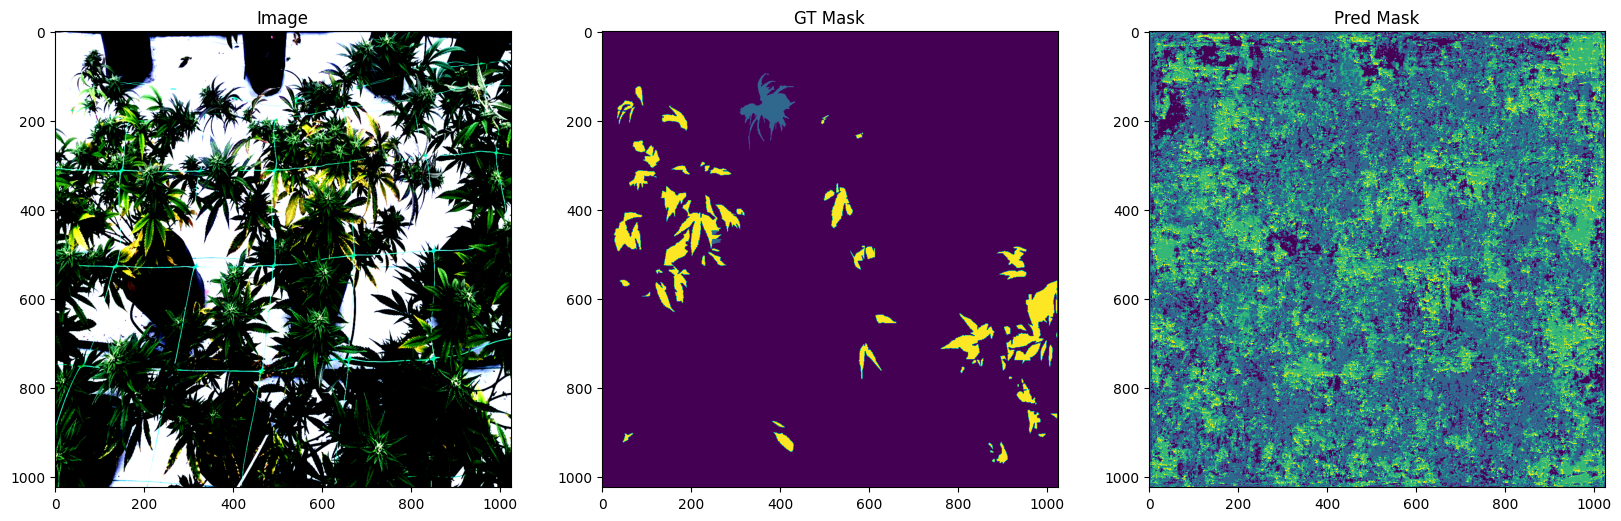

In [18]:
visualizemasks(images, masks, pred_indices)

In [19]:
del outputs, images, masks, pred_indices, true_indices, loss, intersection, union, intersection2, union2, intersection_m, union_m
torch.cuda.empty_cache()

## END DEBUGG

In [3]:
device

device(type='cuda')

In [3]:
os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\Trained Models")
os.getcwd()


'E:\\OneDrive\\Universidad Autónoma de Bucaramanga\\Proyecto de Grado II\\Desarrollo\\Programa Local\\Trained Models'

Conteo por categoría: {0: 250, 1: 64, 2: 6, 3: 7, 4: 24, 5: 138}
Objetos totales: 489


Train loss item 2: 0.05103927105665207
Epoch: 1/120	 Iteration: 1/10
Conteo por categoría: {0: 383, 1: 47, 2: 44, 3: 3, 4: 0, 5: 65}
Objetos totales: 542


Train loss item 2: 0.10787598788738251
Epoch: 1/120	 Iteration: 2/10
Conteo por categoría: {0: 270, 1: 47, 2: 27, 3: 2, 4: 26, 5: 101}
Objetos totales: 473


Train loss item 2: 0.17844197899103165
Epoch: 1/120	 Iteration: 3/10
Conteo por categoría: {0: 6, 1: 48, 2: 49, 3: 1, 4: 0, 5: 149}
Objetos totales: 253


Train loss item 2: 0.2101820632815361
Epoch: 1/120	 Iteration: 4/10
Conteo por categoría: {0: 537, 1: 26, 2: 47, 3: 17, 4: 15, 5: 106}
Objetos totales: 748


Train loss item 2: 0.27496569603681564
Epoch: 1/120	 Iteration: 5/10
Conteo por categoría: {0: 306, 1: 66, 2: 141, 3: 8, 4: 11, 5: 104}
Objetos totales: 636


Train loss item 2: 0.32648976147174835
Epoch: 1/120	 Iteration: 6/10
Conteo por categoría: {0: 177, 1: 35, 2: 41, 3: 4, 4: 5, 

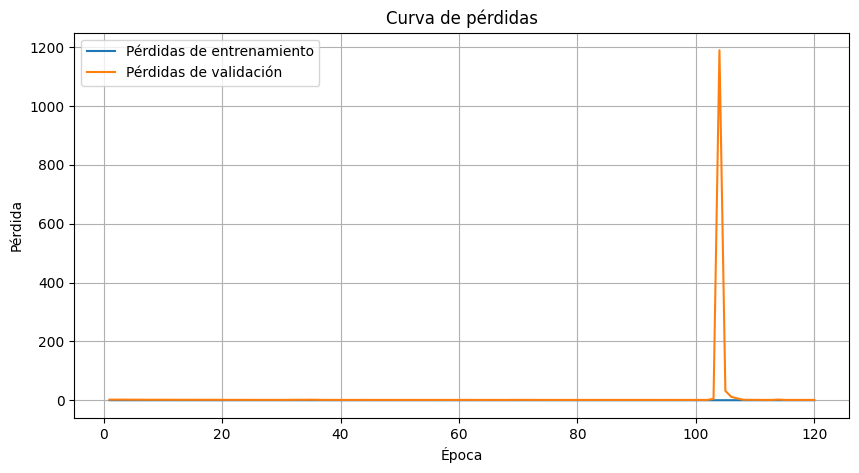

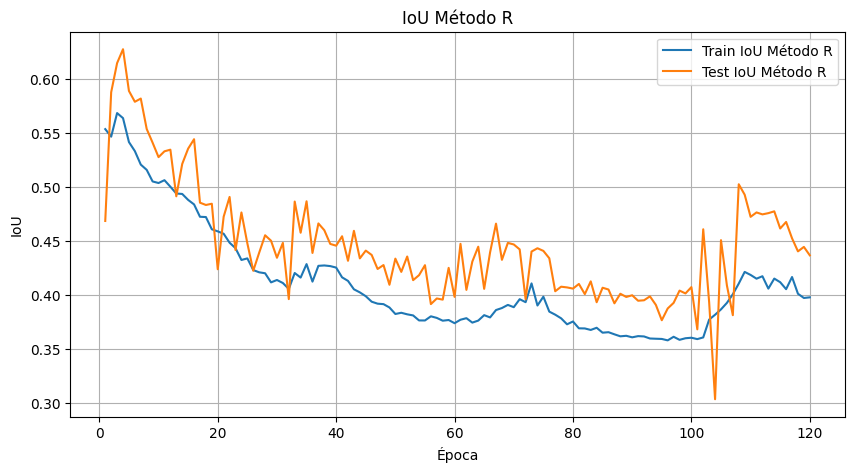

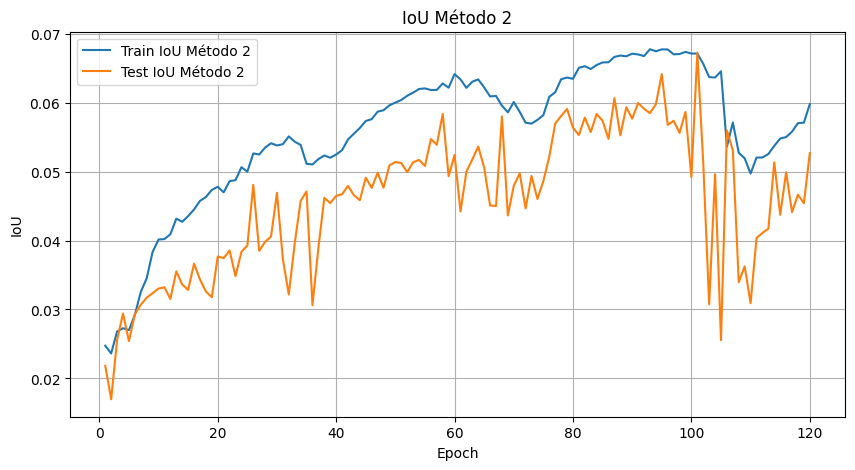

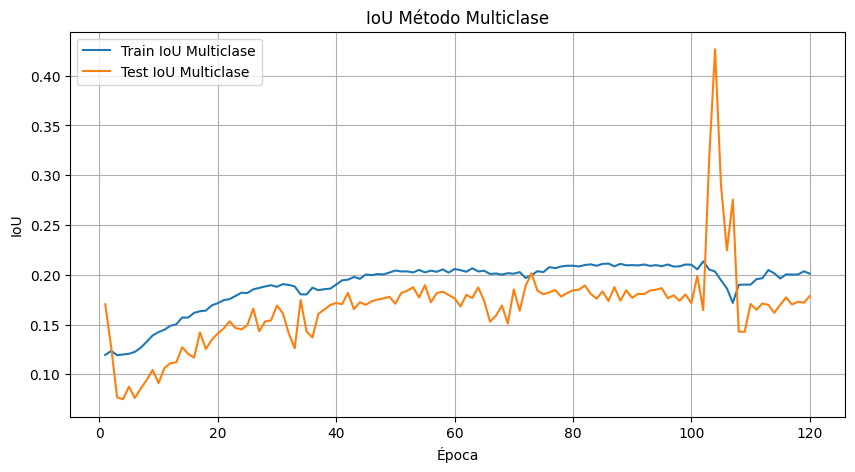

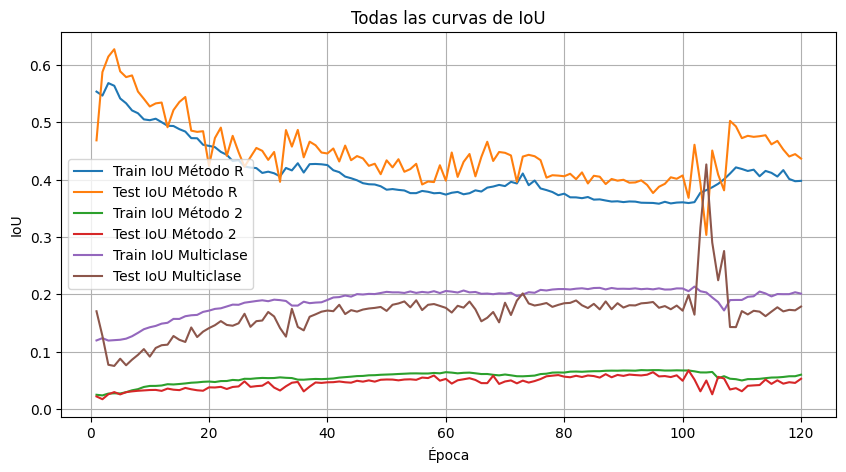

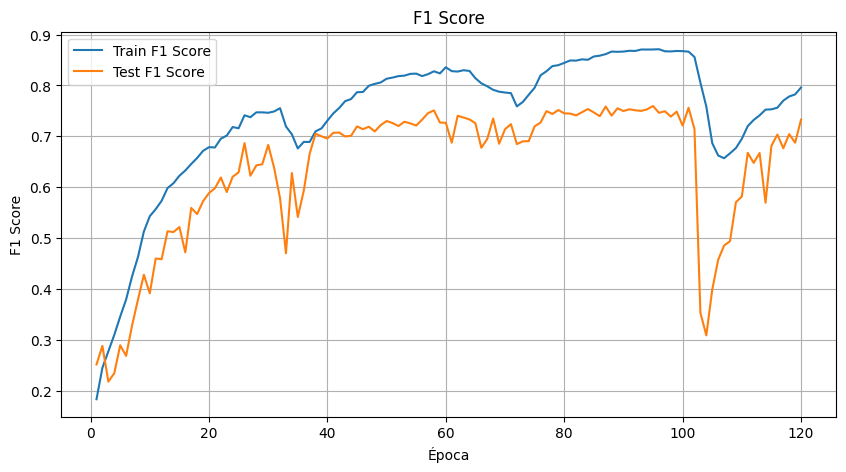

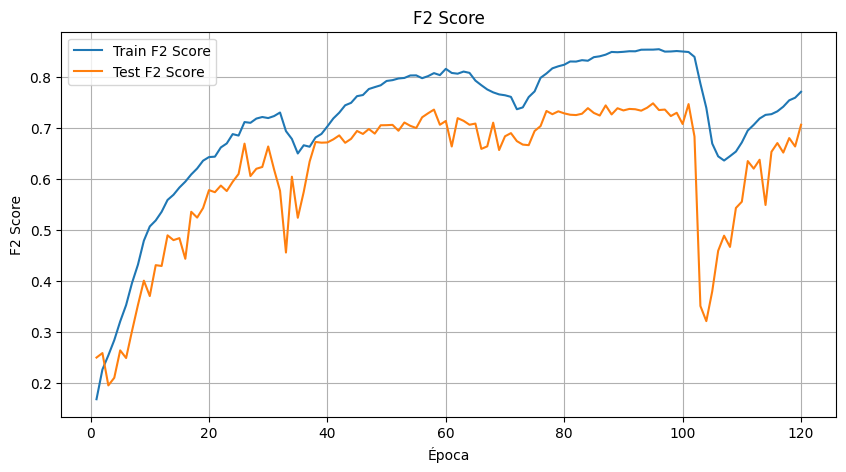

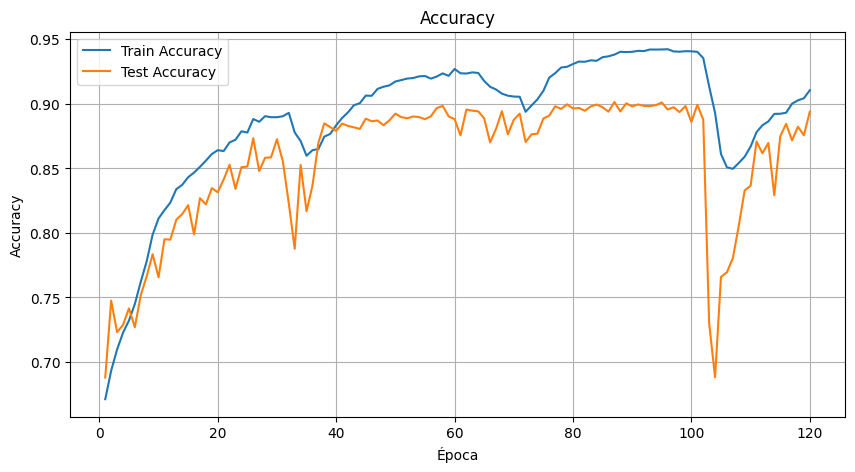

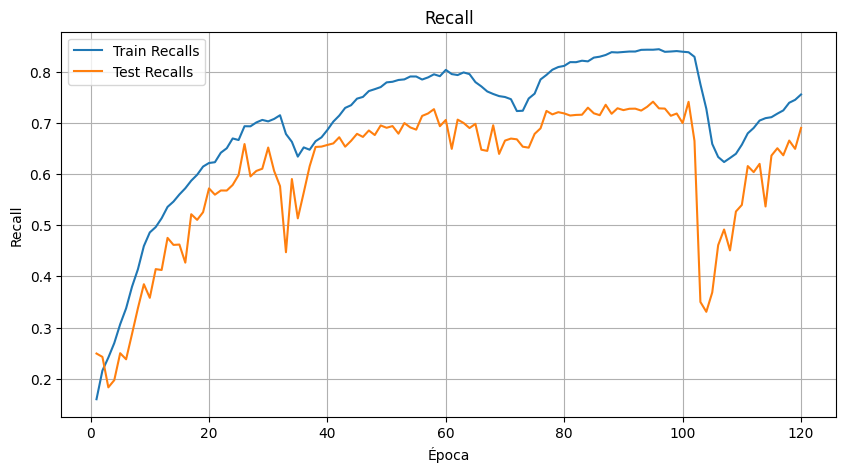

In [3]:

session = 463


def calculate_inter_union_2(predicted_masks, masks):
    predicted_masks = predicted_masks.to(torch.int32)
    masks = masks.to(torch.int32)
    
    intersection = torch.sum(predicted_masks & masks).item()
    union = torch.sum(predicted_masks | masks).item()
    return intersection, union

def calculate_inter_union_multiclass(predicted_masks, masks, num_classes):
    intersection = 0.0
    union = 0.0
    for cls in range(num_classes):
        pred_class = (predicted_masks == cls).float()
        true_class = (masks == cls).float()
        intersection += torch.sum(pred_class * true_class).item()
        union += torch.sum((pred_class + true_class) > 0).item()
    return intersection, union



session_folder = f'training_session_{session}'  
os.makedirs(session_folder, exist_ok=True)

# Train loop

num_epochs = 120
checkpoint_interval = num_epochs/2  
prev_iou = None
best_iou = 0.0
saved_epoch = 0
saved_model_path = None
train_losses = []
train_iou_r = []
train_iou_2 = []
train_iou_m = []
train_f1_scores = []
train_f2_scores = []
train_accuracies = []
train_recalls = []
test_losses = []
test_iou_r = []
test_iou_2 = []
test_iou_m = []
test_f1_scores = []
test_f2_scores = []
test_accuracies = []
test_recalls = []


parameters_tosave = f'Learning Rate: {learning_rate}\n' \
             f'Model: Unet \n' \
             f'Epochs: {num_epochs}\n' \
             f'Encoder: {encoder} \n' \
             f'Encoder Weights: {e_weights} \n' \
             f'Weight Decay: {weight_decay}\n' \
             f'Loss Function: {criterion}\n' \
             f'Class Number: {num_classes}\n' \
             f'Dataset: {dataset_used} \n' \
             f'Training mode: {train_mode} \n' \
             f'Weighted : False \n' \


parameters_file = os.path.join(session_folder, 'parameters_tosave.txt')


model_Unet_prev_state = None
model_Unet_best_result = None

for epoch in range(num_epochs):
    # Modo de Entrenamiento
    model_Unet.train()
    train_loss = 0.0
    intersection_r = 0.0
    intersection2 = 0.0
    intersection_m = 0.0
    union_r = 0.0
    union2 = 0.0
    union_m = 0.0

    tp_train = torch.zeros(1, dtype=torch.float32, device=device)
    fp_train = torch.zeros(1, dtype=torch.float32, device=device)
    fn_train = torch.zeros(1, dtype=torch.float32, device=device)
    tn_train = torch.zeros(1, dtype=torch.float32, device=device)

    for i, (images, masks) in enumerate(dataloader_train):
        optimizer.zero_grad()
        images = images.to(device)
        masks = masks.float().to(device)  
        outputs = model_Unet(images)
        loss = criterion_train(outputs, masks)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        print('\n')

        # IoU método Original
        predicted_masks = torch.argmax(outputs, dim=1).float()
        intersection_r += torch.sum(predicted_masks * masks).item()
        union_r += torch.sum((predicted_masks + masks) > 0).item()

        # IoU Método 2
        inter_2, un_2 = calculate_inter_union_2(predicted_masks, masks)
        intersection2 += inter_2
        union2 += un_2

        # IoU Multiclase
        inter_mc, un_mc = calculate_inter_union_multiclass(predicted_masks, masks, num_classes)
        intersection_m += inter_mc
        union_m += un_mc

        predicted_masks_m = torch.argmax(outputs, dim=1).unsqueeze(1).to(torch.int32)  
        masks_m = torch.argmax(masks, dim=1).unsqueeze(1).to(torch.int32)  
        tp, fp, fn, tn = smp.metrics.get_stats(predicted_masks_m, masks_m, mode='multiclass', num_classes=4)
        tp_train += tp.sum()
        fp_train += fp.sum()
        fn_train += fn.sum()
        tn_train += tn.sum()
        
        print(f'Train loss item 2: {train_loss}')
        print(f'Epoch: {epoch+1}/{num_epochs}\t Iteration: {i+1}/{len(dataloader_train)}')

    # Diferentes métodos de cálculo de IoU
    iou_train_r = intersection_r / union_r
    iou_train_2 = intersection2 / union2
    iou_train_multiclass = intersection_m / union_m

    train_iou_r.append(iou_train_r)
    train_iou_2.append(iou_train_2)
    train_iou_m.append(iou_train_multiclass)

    train_loss /= len(dataloader_train.dataset)
    train_losses.append(train_loss)
    
    # Métricas adicionales
    f1_score_train = smp.metrics.f1_score(tp_train, fp_train, fn_train, tn_train, reduction="micro")
    f2_score_train = smp.metrics.fbeta_score(tp_train, fp_train, fn_train, tn_train, beta=2, reduction="micro")
    accuracy_train = smp.metrics.accuracy(tp_train, fp_train, fn_train, tn_train, reduction="macro")
    recall_train = smp.metrics.recall(tp_train, fp_train, fn_train, tn_train, reduction="micro")

    # Agregando métricas adicionales
    train_f1_scores.append(f1_score_train)
    train_f2_scores.append(f2_score_train)
    train_accuracies.append(accuracy_train)
    train_recalls.append(recall_train)


    print(f'Epoch: {epoch+1}/{num_epochs}\t Training Loss: {train_loss}\t IoU: {iou_train_r}')
    print(f'IoU Method R: {iou_train_r}, intersection_r: {intersection_r}, union_r: {union_r}')
    print(f'IoU Method 2: {iou_train_2}, intersection_2: {intersection2}, union_2: {union2}')
    print(f'IoU Multiclass: {iou_train_multiclass}, intersection_m: {intersection_m}, union_m: {union_m}')
    print(f'F1 Score: {f1_score_train}, F2 Score: {f2_score_train}, Accuracy: {accuracy_train}, Recall: {recall_train}')
    print('\n\n')



    # Modo de Evaluación

    tp_test = torch.zeros(1, dtype=torch.float32, device=device)
    fp_test = torch.zeros(1, dtype=torch.float32, device=device)
    fn_test = torch.zeros(1, dtype=torch.float32, device=device)
    tn_test = torch.zeros(1, dtype=torch.float32, device=device)

    model_Unet.eval()
    test_loss = 0.0
    intersection_test_r = 0.0
    intersection_test_2 = 0.0
    intersection_test_m = 0.0
    union_test_r = 0.0
    union_test_2 = 0.0
    union_test_m = 0.0

    with torch.no_grad():
        for images, masks in dataloader_test:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model_Unet(images)

            loss = criterion(outputs, masks)

            
            predicted_masks = torch.argmax(outputs, dim=1).float()
            intersection_test_r += torch.sum(predicted_masks * masks).item()
            union_test_r += torch.sum((predicted_masks + masks) > 0).item()

            inter_test_2, un_test_2 = calculate_inter_union_2(predicted_masks, masks)
            intersection_test_2 += inter_test_2
            union_test_2 += un_test_2
            
            inter_test_mc, un_test_mc = calculate_inter_union_multiclass(predicted_masks, masks, num_classes)
            intersection_test_m += inter_test_mc
            union_test_m += un_test_mc

            
            test_loss += torch.sum(loss).item()
            print(f'Test loss item: {test_loss}')
            print('\n')

            predicted_masks_m = torch.argmax(outputs, dim=1).unsqueeze(1).to(torch.int32)  
            masks_m = torch.argmax(masks, dim=1).unsqueeze(1).to(torch.int32)  
            tp, fp, fn, tn = smp.metrics.get_stats(predicted_masks_m, masks_m, mode='multiclass', num_classes=4)
            tp_test += tp.sum()
            fp_test += fp.sum()
            fn_test += fn.sum()
            tn_test += tn.sum()

    # Cálculo de IoU Test

    iou_test_r = intersection_test_r / union_test_r
    iou_test_2 = intersection_test_2 / union_test_2
    iou_test_multiclass = intersection_test_m / union_test_m

    test_loss /= len(dataloader_test.dataset)

    test_iou_r.append(iou_test_r)
    test_iou_2.append(iou_test_2)
    test_iou_m.append(iou_test_multiclass)
    test_losses.append(test_loss)

    f1_score_test = smp.metrics.f1_score(tp_test, fp_test, fn_test, tn_test, reduction="micro")
    f2_score_test = smp.metrics.fbeta_score(tp_test, fp_test, fn_test, tn_test, beta=2, reduction="micro")
    accuracy_test = smp.metrics.accuracy(tp_test, fp_test, fn_test, tn_test, reduction="macro")
    recall_test = smp.metrics.recall(tp_test, fp_test, fn_test, tn_test, reduction="micro")
    
    test_f1_scores.append(f1_score_test)
    test_f2_scores.append(f2_score_test)
    test_accuracies.append(accuracy_test)
    test_recalls.append(recall_test)
  

    print(f'Test Loss: {test_loss}\t IoU: {iou_test_r}')
    print(f'Test IoU Method 2: {iou_test_2}')
    print(f'Test IoU Multiclass: {iou_test_multiclass}')
    print(f'F1 Score Test: {f1_score_test}, F2 Score Test: {f2_score_test}, Accuracy: {accuracy_test}, Recall: {recall_test}')
    print(f'Epoch: {epoch+1}/{num_epochs}\t Test Loss: {test_loss}\t IoU: {iou_test_r}', "\n\n")

    intervalo = (epoch + 1) % checkpoint_interval
    if intervalo == 0:
      print(intervalo)
      checkpoint_path = os.path.join(session_folder, f'model_Unet_checkpoint_epoch_{epoch+1}.pt')
      torch.save(model_Unet.state_dict(), checkpoint_path)
      print(f'Saved model checkpoint at epoch {epoch+1}: {checkpoint_path}')
      print('Parametros: ', 'learnig rate: ', learning_rate, 'Epocas: ', num_epochs)
      print('criterion: ', criterion_train, 'Optimizador: ', optimizer)
      print(f'Encoder: {encoder}')
      print(f'Sesión: {session}')

    if iou_train_r > best_iou:
        best_iou = iou_train_r
        model_Unet_best_result = model_Unet.state_dict()
        saved_epoch = epoch 

    if model_Unet_best_result is not None:
        best_model_path = os.path.join(session_folder, 'model_Unet_best.pt')
        torch.save(model_Unet_best_result, best_model_path)
        print(f"Model saved at epoch {saved_epoch} with best IoU: {best_iou}. Path: {best_model_path}")
  
    # Aplicando Early Stopping
    if prev_iou is not None and iou_train_r == 0: # prev_iou - iou_train > threshold:
        print(f"Sudden drop in IoU detected. Stopping training and saving model from epoch {epoch}.")
        saved_model_path = os.path.join(session_folder, f'model_Unet_checkpoint_epoch_{saved_epoch}.pt')
        torch.save(model_Unet_prev_state, saved_model_path)
        break
    
    if iou_train_r != 0:
        model_Unet_prev_state = model_Unet.state_dict()
        saved_epoch = saved_epoch +1

    print('IoU Previo', prev_iou)
    prev_iou = iou_train_r
    print('IoU Actual', iou_train_r)
    print('\n\n\n\n')


# checar los parámetros del modelo
for name, param in model_Unet.named_parameters():
    if 'dropout' in name:
        print(f"Dropout layer: {name}, Dropout rate: {param.item()}")


if saved_model_path is not None:
    print(f"Model saved at epoch {saved_epoch}: {saved_model_path}")


# Append best IoU to parameters string and save
parameters_tosave += f"Best IoU: {best_iou}\n"

with open(parameters_file, 'w') as file:
    file.write(parameters_tosave)

print(f"Parámetros guardados en: {parameters_file}")

completed_epochs = len(train_losses)


train_f1_scores_cpu = [score.cpu().numpy() if isinstance(score, torch.Tensor) else score for score in train_f1_scores]
test_f1_scores_cpu = [score.cpu().numpy() if isinstance(score, torch.Tensor) else score for score in test_f1_scores]
train_f2_scores_cpu = [score.cpu().numpy() if isinstance(score, torch.Tensor) else score for score in train_f2_scores]
test_f2_scores_cpu = [score.cpu().numpy() if isinstance(score, torch.Tensor) else score for score in test_f2_scores]
train_accuracies_cpu = [acc.cpu().numpy() for acc in train_accuracies]
test_accuracies_cpu = [accs.cpu().numpy() for accs in test_accuracies]
train_recalls_cpu = [rec.cpu().numpy() for rec in train_recalls]
test_recalls_cpu = [rec.cpu().numpy() for rec in test_recalls]

# Pérdidas
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs+1), train_losses, label='Pérdidas de entrenamiento')
plt.plot(range(1, completed_epochs+1), test_losses, label='Pérdidas de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de pérdidas')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'loss_curve.png'))
plt.show()

# Método R
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs+1), train_iou_r, label='Train IoU Método R')
plt.plot(range(1, completed_epochs+1), test_iou_r, label='Test IoU Método R')
plt.xlabel('Época')
plt.ylabel('IoU')
plt.title('IoU Método R')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'iou_curve_method_r.png'))
plt.show()

# Método 2
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs+1), train_iou_2, label='Train IoU Método 2')
plt.plot(range(1, completed_epochs+1), test_iou_2, label='Test IoU Método 2')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('IoU Método 2')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'iou_curve_method_2.png'))
plt.show()

# Método Multiclase
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs+1), train_iou_m, label='Train IoU Multiclase')
plt.plot(range(1, completed_epochs+1), test_iou_m, label='Test IoU Multiclase')
plt.xlabel('Época')
plt.ylabel('IoU')
plt.title('IoU Método Multiclase')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'iou_curve_multiclass.png'))
plt.show()

# Ploteo de todas las curvas en conjunto
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs+1), train_iou_r, label='Train IoU Método R')
plt.plot(range(1, completed_epochs+1), test_iou_r, label='Test IoU Método R')
plt.plot(range(1, completed_epochs+1), train_iou_2, label='Train IoU Método 2')
plt.plot(range(1, completed_epochs+1), test_iou_2, label='Test IoU Método 2')
plt.plot(range(1, completed_epochs+1), train_iou_m, label='Train IoU Multiclase')
plt.plot(range(1, completed_epochs+1), test_iou_m, label='Test IoU Multiclase')
plt.xlabel('Época')
plt.ylabel('IoU')
plt.title('Todas las curvas de IoU')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'all_iou_curves.png'))
plt.show()

# F1 Score 
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs + 1), train_f1_scores_cpu, label='Train F1 Score')
plt.plot(range(1, completed_epochs + 1), test_f1_scores_cpu, label='Test F1 Score')
plt.xlabel('Época')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'f1_score_curve.png'))
plt.show()

# F2 Score 
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs + 1), train_f2_scores_cpu, label='Train F2 Score')
plt.plot(range(1, completed_epochs + 1), test_f2_scores_cpu, label='Test F2 Score')
plt.xlabel('Época')
plt.ylabel('F2 Score')
plt.title('F2 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'f2_score_curve.png'))
plt.show()

# Precisión
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs + 1), train_accuracies_cpu, label='Train Accuracy')
plt.plot(range(1, completed_epochs + 1), test_accuracies_cpu, label='Test Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'accuracy_curve.png'))
plt.show()

# Recall
plt.figure(figsize=(10, 5))
plt.plot(range(1, completed_epochs + 1), train_recalls_cpu, label='Train Recalls')
plt.plot(range(1, completed_epochs + 1), test_recalls_cpu, label='Test Recalls')
plt.xlabel('Época')
plt.ylabel('Recall')
plt.title('Recall')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(session_folder, 'recalls_curve.png'))
plt.show()


32: [0.01629927, 0.133656, 0.44484855,  0.94456, 0.474887, 0.08930389]

Sesion 9

# INFERENCE

tensor([[[[ 2.0570,  2.0100,  1.8064,  ...,  2.0866,  1.9630,  1.0219],
          [ 3.8612,  3.7518,  3.5589,  ...,  3.8425,  3.2413,  1.7481],
          [ 4.5802,  4.7256,  4.7496,  ...,  3.9065,  2.6351,  1.2262],
          ...,
          [ 1.1719,  1.9210,  1.8898,  ...,  1.3005,  1.7090,  1.4678],
          [ 0.7721,  1.4104,  1.6622,  ...,  1.0899,  1.2842,  0.9396],
          [ 0.4693,  0.8815,  1.1786,  ...,  0.5176,  0.8494,  0.5918]],

         [[-0.9308,  0.1637, -0.0641,  ..., -0.1807, -0.2913, -0.3347],
          [-2.0630, -1.2045, -2.0658,  ..., -1.7132, -1.2119, -0.5138],
          [-2.0272, -1.5609, -2.9850,  ..., -2.7546, -1.6441, -0.7890],
          ...,
          [ 0.4853,  1.3643,  0.7916,  ...,  1.1443,  0.5930,  0.8874],
          [ 0.4989,  1.4081,  1.0304,  ...,  1.3268,  0.6664,  0.9803],
          [ 0.8679,  1.5558,  1.5272,  ...,  1.0875,  0.7130,  0.7127]],

         [[-0.5048, -0.6800, -1.4157,  ..., -2.5012, -1.7626, -1.2326],
          [-1.5323, -2.1844, -

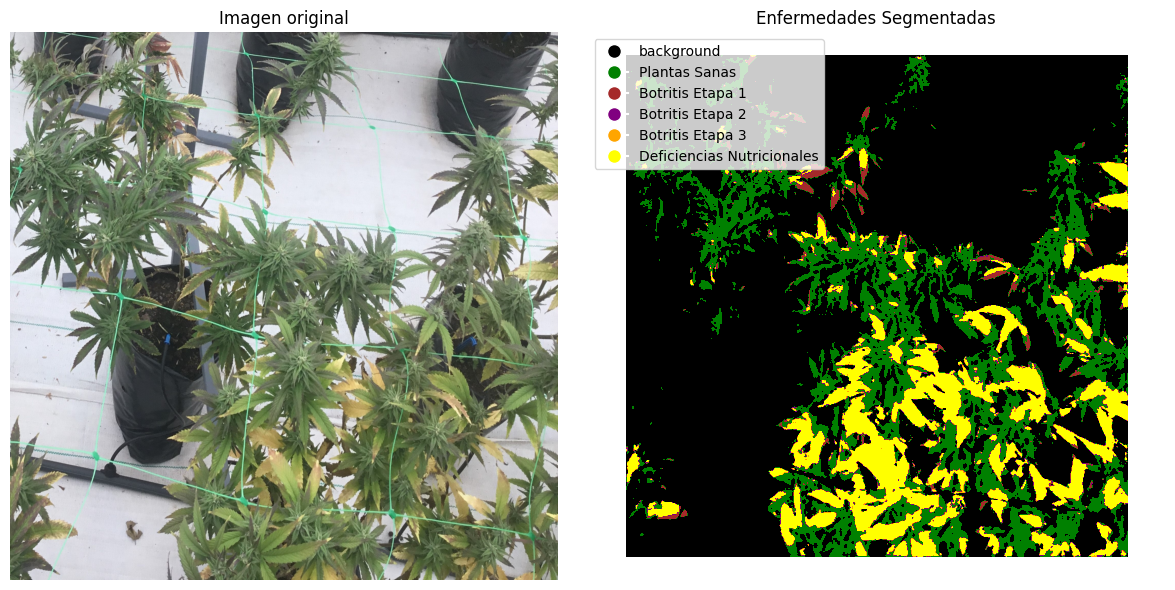

In [16]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import segmentation_models_pytorch as smp
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local")

import segmentation_models_pytorch as smp

num_classes = 6
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = 'resnet101'
e_weights = 'imagenet'   
train_mode = 'RAW'
model_u = 'Unet'  




model_Unet = smp.Unet(
    encoder_name=f"{encoder}",
    encoder_weights=f"{e_weights}",
    in_channels=3,
    classes=num_classes,
    
)

# Cargar los pesos propios
model_path = r'Trained Models\training_session_41\model_Unet_checkpoint_epoch_40.pt'
model_Unet.load_state_dict(torch.load(model_path, map_location=device))
model_Unet.eval()

# Carga y preprocesamiento de la imagen
image_path = r'Images for Inference\20220921_162649249_iOS.jpg'

image = Image.open(image_path).convert('RGB')
image = image.resize((1024, 1024))
image_original = image
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_image = preprocess(image).unsqueeze(0)


# Inferencia
with torch.no_grad():
    output = model_Unet(input_image)
print(output)
predicted_masks = torch.argmax(output, dim=1)
input_image_np = input_image.squeeze(0).permute(1, 2, 0).numpy()
predicted_masks_np = predicted_masks.squeeze(0).numpy()

# Mapeado de clases y categorias
class_names_f = ["background", "Plantas Sanas", "Botritis Etapa 1", "Botritis Etapa 2", "Botritis Etapa 3", "Deficiencias Nutricionales"]
class_colors = ['black','green','brown', 'purple', 'orange', 'yellow']

# Comprobación y mapeado de valores únicos
unique_values = np.unique(predicted_masks_np)
predicted_categories = [class_names_f[value] for value in unique_values]

# Conteo de píxeles
class_pixels = {class_name: np.sum(predicted_masks_np == class_id) for class_id, class_name in enumerate(class_names_f)}
total_pixels = np.sum(list(class_pixels.values()))

# Porcentajes presentes en la inferencia
class_percentages = {class_name: pixels / total_pixels * 100 for class_name, pixels in class_pixels.items()}
largest_class = max(class_percentages, key=class_percentages.get)
if largest_class == 'background':
    del class_percentages[largest_class]
    largest_class = max(class_percentages, key=class_percentages.get)

# Enfermedad más detectada
print("Clase con la mayor presencia:", largest_class)

# Porcentajes de clases
for class_name, percentage in class_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")


# Configuración de la gráfica
cmap = plt.get_cmap('tab10', len(class_names_f))
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name, markerfacecolor=color, markersize=10) for class_name, color in zip(class_names_f, class_colors)]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_original)
axes[0].set_title("Imagen original")
axes[0].axis('off')
axes[1].imshow(predicted_masks_np, cmap=ListedColormap(class_colors))
axes[1].set_title('Enfermedades Segmentadas')
axes[1].axis('equal')
axes[1].axis('off')

# Leyendas
axes[1].legend(handles=legend_elements, loc='upper left')
image_name = os.path.splitext(os.path.basename(image_path))[0]

# Guardar comparación
comparison_image_path = os.path.join(os.path.dirname(model_path), f"{image_name}_comparison_image.png")
plt.savefig(comparison_image_path)
plt.tight_layout()
plt.show()

https://www.riverbankcomputing.com/static/Docs/PyQt5/
https://misovirtual.virtual.uniandes.edu.co/codelabs/interfaces-graficas-pyqt5/index.html?index=..%2F..index#0
https://www.youtube.com/watch?v=sAebf7AL_eQ
https://unipython.com/pyqt5-interfaces-graficas-con-python/
https://build-system.fman.io/pyqt5-tutorial

## FIN DEL ENTRENAMIENTO

##  PYTORCH

https://colab.research.google.com/github/sachinruk/blog/blob/master/_notebooks/2021-08-21-coco-semantic-segmentation-data.ipynb#scrollTo=Jr4iFYp155HV